<a href="https://colab.research.google.com/github/binhduc0402/BT_AI/blob/main/Social_Network_Ads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sas

data= pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


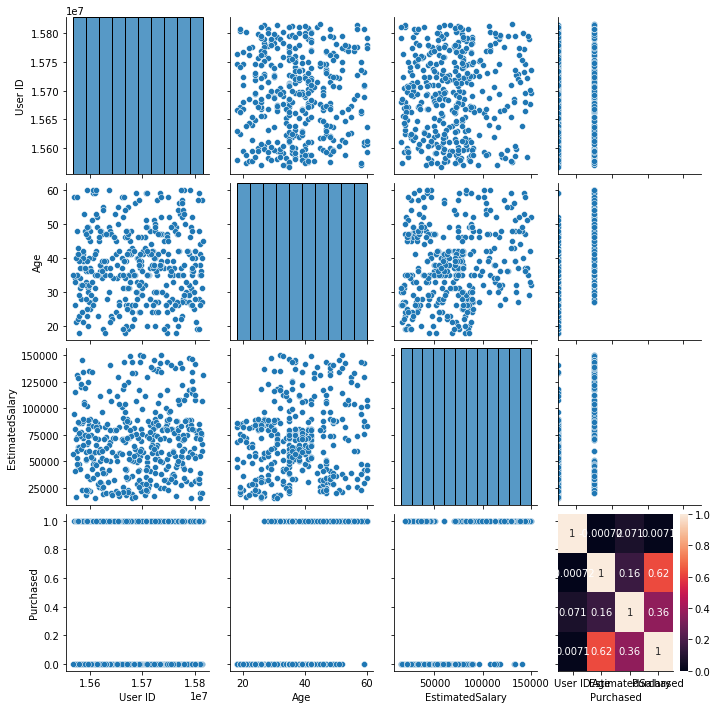

In [14]:
sas.pairplot(data)
corr=data.corr()
sas.heatmap(corr,annot=True)
X=data.drop(data.columns[[0,1,4]],axis=1)
y= data['Purchased']
X.head()

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X=sc.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(80,)

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train) # train cho máy với X_train, y_train 
y_pread = regressor.predict(X_test).round(1) # Làm tròn với 1 số
calculation= pd.DataFrame(np.c_[y_test,y_pread],columns=['Original charges','Predicted charges'])

print('Độ chính xác của mô hình')
print(regressor.score(X_train,y_train))
print(regressor.score(X_test,y_test))
print(calculation)

Độ chính xác của mô hình
0.4251634496686547
0.5973283861259657
    Original charges  Predicted charges
0                0.0                0.2
1                0.0                0.3
2                0.0                0.3
3                0.0                0.2
4                0.0                0.2
..               ...                ...
75               0.0               -0.1
76               0.0                0.5
77               0.0                0.4
78               1.0                0.6
79               1.0                0.7

[80 rows x 2 columns]
